##### 例外處理 ( try、except )
執行 Python 程式的時候，往往會遇到「錯誤」的狀況，如果沒有好好處理錯誤狀況，就會造成整個程式壞掉而停止不動，因此，透過「例外處理」的機制，\
能夠在發生錯誤時進行對應的動作，不僅能保護整個程式的流程，也能夠掌握問題出現的位置，馬上進行修正。

##### 使用 try 和 except 
下方的例子執行後，會發生「TypeError」的錯誤 ( 因為輸入的是文字，文字無法和數字相加 )，也因為發生錯誤，進而造成程式停止，後方程式無法正常執行。

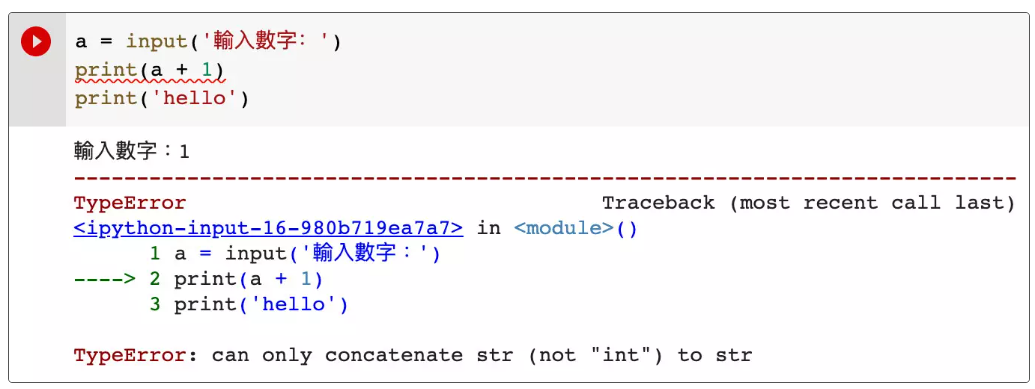

In [ ]:
a = input('輸入數字：')
print(a + 1)       # 發生錯誤
print('hello')      # 因為發生錯誤，造成程式停止，所以後方程式無法執行

如果要避免程式因錯誤而停止，可使用 try 和 except 進行保護 ( 或測試 )，當 try 區段內的程式發生錯誤時，就會執行 except 裡的內容，\
如果 try 的程式沒有錯誤，就不會執行 except 的內容，當程式修改成下面的樣子，就會順利印出後方的 hello。

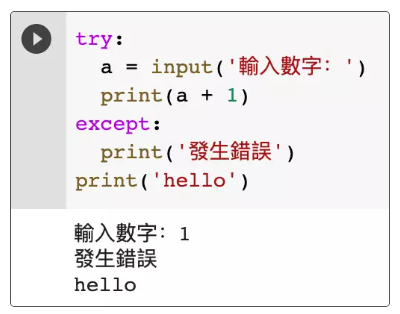

In [ ]:
try:                      # 使用 try，測試內容是否正確
    a = input('輸入數字：')
    print(a + 1)
except:                   # 如果 try 的內容發生錯誤，就執行 except 裡的內容
    print('發生錯誤')
print('hello')

##### 加入 pass 略過 
在撰寫 try... except 有時候會遇到「不想做任何動作」的狀況 ( 連 print 都不想使用 )，這時可以使用 pass 語法來略過 ( 什麼事情都不做 )，\
以下方的程式而言，當發生錯誤時，進入 excpet 後就會直接忽略並跳過。

In [ ]:
try:                      # 使用 try，測試內容是否正確
    a = input('輸入數字：')
    print(a + 1)
except:                   # 如果 try 的內容發生錯誤，就執行 except 裡的內容
    pass                  # 略過
print('hello')

##### except 的錯誤資訊 
只要程式發生錯誤，控制台中都會出現對應的錯誤資訊，下方列出常見的幾種錯誤資訊 ( 詳細錯誤資訊參考：[Built-in Exceptions](https://docs.python.org/3/library/exceptions.html) )：

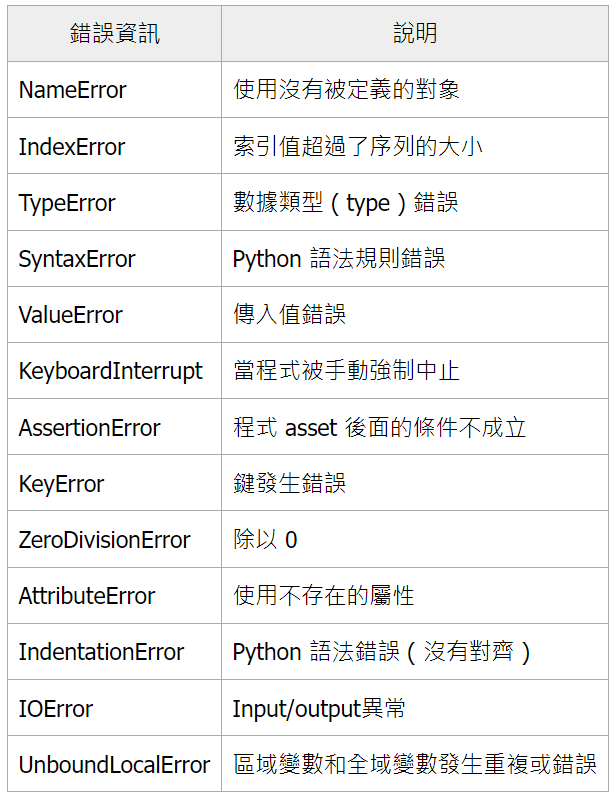

下面的程式執行時，因為變數 a 還沒被定義，所以會進入 except NameError 的區段，印出「使用沒有被定義的對象」。

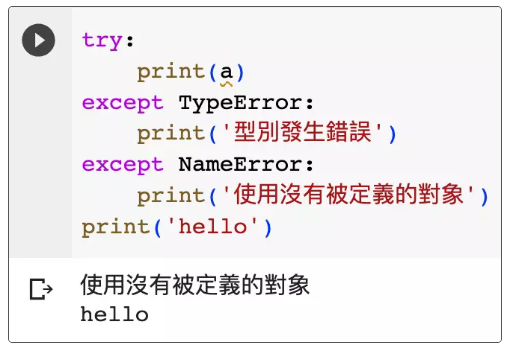

In [ ]:
try:
    print(a)
except TypeError:
    print('型別發生錯誤')
except NameError:
    print('使用沒有被定義的對象')
print('hello')

如果不知道錯誤的型別，只想印出錯誤資訊，除了單純用 except，也可以使用「except Exception」，將例外的資訊全部放在裡面。

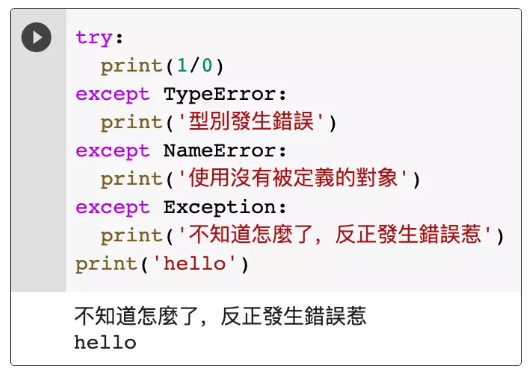

In [ ]:
try:
    print(1/0)
except TypeError:
    print('型別發生錯誤')
except NameError:
    print('使用沒有被定義的對象')
except Exception:
    print('不知道怎麼了，反正發生錯誤惹')
print('hello')

如果單純使用 except Exception as e，也能將所有的錯誤資訊全部印出。

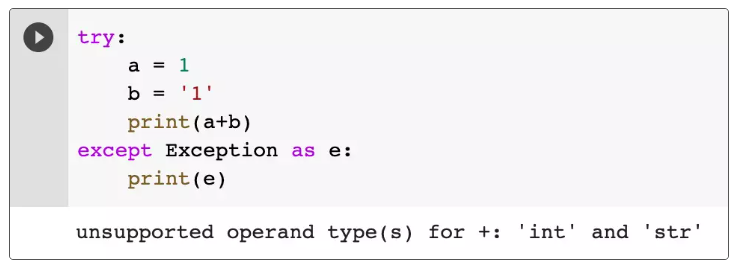

In [ ]:
try:
    a = 1
    b = '1'
    print(a+b)
except Exception as e:
    print(e)

##### raise 和 assert 
在執行 try 的過程中，如果遇到需要「強制中斷」的情形，可使用 raise 強制中斷。

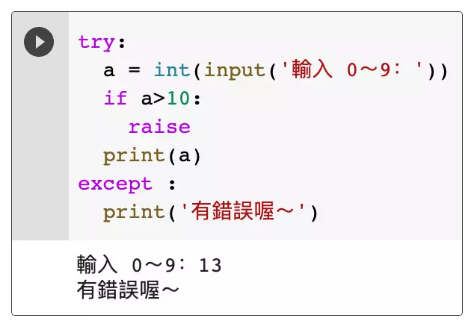

In [ ]:
try:
    a = int(input('輸入 0～9：'))
    if a>9:       # 如果輸入的 a 大於 9
        raise       # 強制中斷，拋出錯誤資訊席
    print(a)
except :
    print('有錯誤喔～')   # 收到錯誤訊息，顯示錯誤

raise 後方可以加上錯誤資訊，錯誤資訊可以包含要呈現的訊息，以下方的例子而言，強制停止時回報 ValueError 資訊，\
接著使用 except 區隔錯誤資訊，就能呈現真實的錯誤狀況。

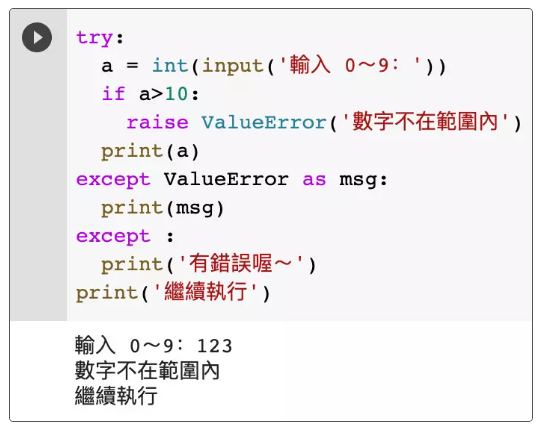

In [ ]:
try:
    a = int(input('輸入 0～9：'))
    if a>10:
        raise ValueError('數字不在範圍內')
    print(a)
except ValueError as msg:    # 如果輸入範圍外的數字或解析非 10 進位數字，執行這邊的程式
    print(msg)
except :                     # 其他錯誤，執行這邊的程式
    print('有錯誤喔～')
print('繼續執行')

使用 assert 中斷的方法為「assert False, '錯誤訊息'」，用法和 raise 類似，執行後就會中斷程式，並將錯誤資訊提供給 except 顯示，\
下方的程式如果輸入 123，會執行 AssertionError 裡的程市，如果輸入 abc 則會執行 except 裡的程式。

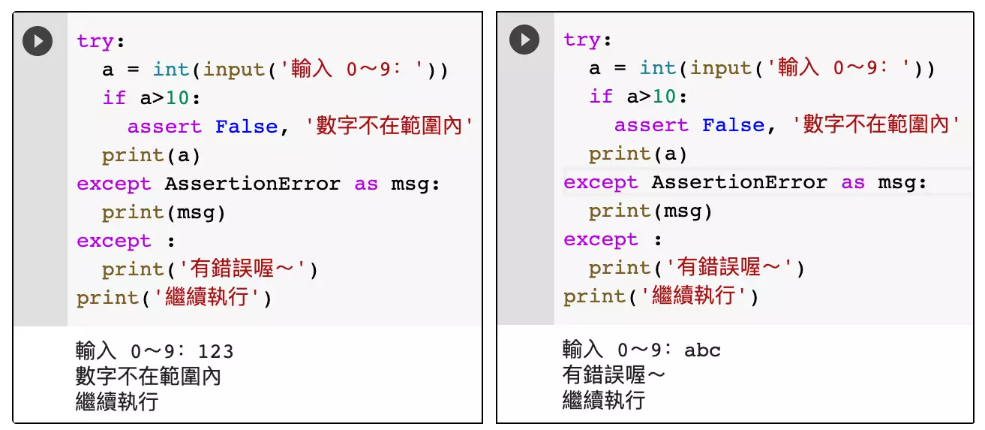

In [ ]:
try:
    a = int(input('輸入 0～9：'))
    if a>10:
        assert False, '數字不在範圍內'
    print(a)
except AssertionError as msg:
    print(msg)
except :
    print('有錯誤喔～')
print('繼續執行')

##### 加入 else 和 finally 
在 except 結束後，可以加入 else 或 finally 兩個額外的判斷，else 表示完全沒有錯誤，就會執行該區塊的程式，finally 則不論程式對錯，\
都會執行該區塊的程式。

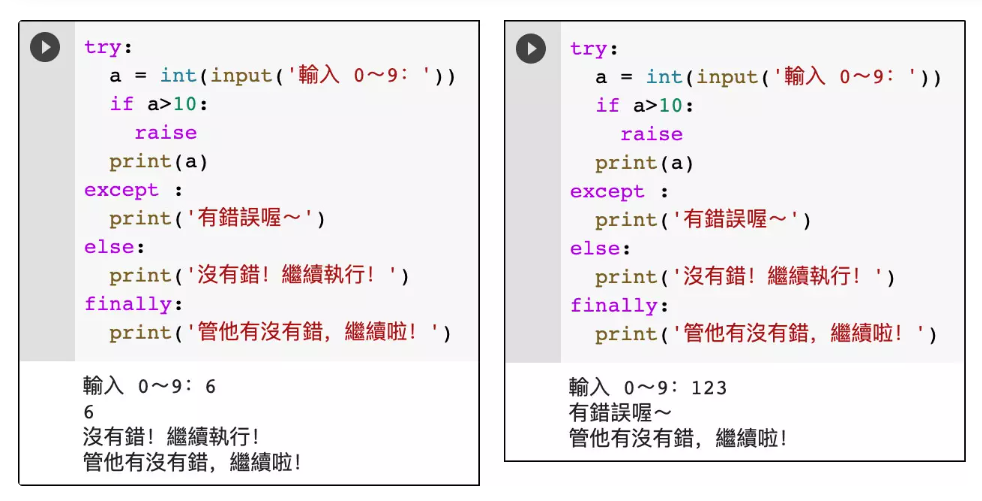

In [ ]:
try:
    a = int(input('輸入 0～9：'))
    if a>10:
        raise
    print(a)
except :
    print('有錯誤喔～')
else:
    print('沒有錯！繼續執行！')       # 完全沒錯才會執行這行
finally:
    print('管他有沒有錯，繼續啦！')    # 不論有沒有錯都會執行這行 